In [1]:
# Import libraries
import numpy as np
from numpy import pi as pi
from PIL import Image
from collections import OrderedDict
import matplotlib.pyplot as plt
import sys, random, ast, time
from pathlib import Path
import re
import pandas
import inspect

# Import Qiskit

from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

from qiskit_aer.noise import NoiseModel
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import datetime

In [2]:
# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [3]:
import pathlib

In [40]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum", token="insert-your-ibm-token-here-if-you-would-like-to-generate-quantum-database-from-IBM-Quantum")

In [5]:
backend = service.backend('ibm_sherbrooke')
backend.name

'ibm_sherbrooke'

In [10]:
backend = service.backend('ibm_kyoto')
backend.name

'ibm_kyoto'

In [19]:
backend = service.backend('ibm_kyiv')# ibm_osaka is down from IBM Quantum, they launched ibm_kyiv
backend.name

'ibm_kyiv'

In [15]:
backend = service.backend('ibm_brisbane')
backend.name

'ibm_brisbane'

# Generating csv files from IBM quantum computers (publicly accessible) if you would like to generate a new quantum database.

In [20]:
new_dir_name = 'QuantumDatabase_v7' #give your database version name, e.g. QuantumDatabase_v7 if you would like to create a new quantum database, since QuantumDatabase_v1 to QuantumDatabase_v5 exist.
path = '/path/to/your/data_folder/' # insert a path you would like to store your quantum database (e.g. data folder)
new_dir = pathlib.Path(path, new_dir_name)
new_dir.mkdir(parents=True, exist_ok=True)

In [12]:
import sys
import os

# Add the src folder to the Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)
    
from parameters_modified import gate_param_values, gate_error_values, gate_length_values, readout_error_values 
from parameters_modified import thermal_relaxation_values, basis_gates_list, coupling_map_list

In [22]:
backendName = backend.name
properties = backend.properties()

GateParams = gate_param_values(properties, backendName, new_dir)
GateErrors = gate_error_values(properties, backendName, new_dir)
GateLengths = gate_length_values(properties, backendName, new_dir)
GateReadouts = readout_error_values(properties, backendName, new_dir)
GateThermals = thermal_relaxation_values(properties, backendName, new_dir)
Basisgates = basis_gates_list(backend, backendName, new_dir)
CMap = coupling_map_list(backend, backendName, new_dir)

# Reading from csv files

In [19]:
new_dir_name = 'QuantumDatabase_v5' #choose your quantum database e.g., QuantumDatabase_v6 already generated and exist in the "QuantumDatabase" folder.
path = '/path/to/your/data_folder/' # insert a path you stored your quantum database
new_dir = pathlib.Path(path, new_dir_name)



In [21]:
import os, fnmatch
def find(pattern, path):
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result = os.path.join(root, name)
    return result

In [22]:
#reading a coupling map from a csv file

ibmQname = '*osaka*'
pattern = ibmQname+'coupling_map.csv'
filename = find(pattern, new_dir)
coupling_map = pandas.read_csv(filename, header = None)

coupling_m = []
for i in coupling_map.values.tolist()[0]:
    first = int(i.split('[')[1].split(']')[0].split(',')[0])
    second = int(i.split('[')[1].split(']')[0].split(',')[1])
    arr = [first, second]
    coupling_m.append(arr)

In [23]:
ibmQname = '*osaka*'

In [24]:
pattern = ibmQname+'readout_error_values.csv'
filename = find(pattern, new_dir)

colnames = ['prob_meas1_prep0', 'prob_meas0_prep1']
GateReadoutsPD = pandas.read_csv(filename, names=colnames)
GateReadoutsPD

prob_meas1_prep0  prob_meas0_prep1
0              0.0286            0.0230
1              0.0084            0.0216
2              0.0316            0.0216
3              0.0450            0.0208
4              0.2540            0.7312
..                ...               ...
122            0.0158            0.0140
123            0.0120            0.0078
124            0.0240            0.0154
125            0.0448            0.0410
126            0.0164            0.0122

[127 rows x 2 columns]

In [25]:
pattern = ibmQname+'gate_param_values.csv'
filename = find(pattern, new_dir)
colnames = ['gate_name', 'qubits', 'gate_length', 'gate_error']
GateParamsPD = pandas.read_csv(filename, names=colnames)
GateParamsPD

gate_name qubits  gate_length  gate_error
0          id    [0]           60    0.000146
1          id    [1]           60    0.000713
2          id    [2]           60    0.000226
3          id    [3]           60    0.000185
4          id    [4]           60    0.001490
..        ...    ...          ...         ...
774     reset  [122]         3660         NaN
775     reset  [123]         3660         NaN
776     reset  [124]         3660         NaN
777     reset  [125]         3660         NaN
778     reset  [126]         3660         NaN

[779 rows x 4 columns]

In [26]:
pattern = ibmQname+'gate_error_values.csv'
filename = find(pattern, new_dir)
colnames = ['gate_name', 'qubits', 'gate_error']
GateErrorsPD = pandas.read_csv(filename, names=colnames)
GateErrorsPD

gate_name qubits  gate_error
0          id    [0]    0.000146
1          id    [1]    0.000713
2          id    [2]    0.000226
3          id    [3]    0.000185
4          id    [4]    0.001490
..        ...    ...         ...
774     reset  [122]         NaN
775     reset  [123]         NaN
776     reset  [124]         NaN
777     reset  [125]         NaN
778     reset  [126]         NaN

[779 rows x 3 columns]

In [27]:
pattern = ibmQname+'gate_length_values.csv'
filename = find(pattern, new_dir)
colnames = ['gate_name', 'qubits', 'gate_length']
GateLengthsPD = pandas.read_csv(filename, names=colnames)
GateLengthsPD
GateErrorsPD

gate_name qubits  gate_error
0          id    [0]    0.000146
1          id    [1]    0.000713
2          id    [2]    0.000226
3          id    [3]    0.000185
4          id    [4]    0.001490
..        ...    ...         ...
774     reset  [122]         NaN
775     reset  [123]         NaN
776     reset  [124]         NaN
777     reset  [125]         NaN
778     reset  [126]         NaN

[779 rows x 3 columns]

In [28]:
pattern = ibmQname+'thermal_relaxation_values.csv'
filename = find(pattern, new_dir)
colnames = ['T1', 'T2', 'Freqs']
GateThermals = pandas.read_csv(filename, names=colnames)
GateThermals

T1             T2     Freqs
0    471109.794466  262725.138445  4.822478
1     22086.872370   52635.229432  4.772685
2    181535.014552  329058.520804  4.718297
3    383887.743283  166860.890255  4.800226
4    304941.310860   84646.301571  4.803165
..             ...            ...       ...
122  353754.257931  277774.741384  4.880446
123  273130.927621  242575.065872  5.058563
124  343613.272951  241429.570592  4.846353
125  159874.541321  162778.614411  5.042870
126  272504.871102  151312.874999  4.993300

[127 rows x 3 columns]

In [29]:
from numpy import inf

# Time and frequency unit conversions
_NANOSECOND_UNITS = {"s": 1e9, "ms": 1e6, "µs": 1e3, "us": 1e3, "ns": 1}
_GHZ_UNITS = {"Hz": 1e-9, "KHz": 1e-6, "MHz": 1e-3, "GHz": 1, "THz": 1e3}

In [30]:
def getDecoherenceTimes(t1, t2, unit):
    '''Returns the thermal relaxation time T1 and the qubit dephasing time T2, as given by IBMQ.'''
    t1er = t1.tolist()
    t2er = t2.tolist()

    for i in range(0, len(t1er)):
        t1er[i] *= _NANOSECOND_UNITS.get(unit, 1)
        t2er[i] *= _NANOSECOND_UNITS.get(unit, 1)

    T1s = np.array(t1er)
    T2s = np.array(t2er)
    
    # Check for error in IBMQ's measurements (i.e it must always be T2 <= 2T1)
    c = 0
    for i in range(0,len(T1s)):
        if (T2s[i] > 2*T1s[i]):
            c = 1
            print("ERROR: incompatible decay rates - Qubit Q" + str(i) + ", T2 =", T2s[i], "and T1 =", T1s[i])
    if (c == 0):
        print(r'Checking decoherence times: all ok')

    return T1s,T2s

In [31]:
ibmQname = '*osaka*'
filename = find(pattern, new_dir)
colnames = ['T1', 'T2', 'Freqs']
GateThermals = pandas.read_csv(filename, names=colnames)

t1 = GateThermals['T1']
t2 = GateThermals['T2']
t1s, t2s = getDecoherenceTimes(t1, t2, 'us')

ERROR: incompatible decay rates - Qubit Q1, T2 = 52635229.43150382 and T1 = 22086872.3696948
ERROR: incompatible decay rates - Qubit Q16, T2 = 332425817.6295806 and T1 = 7717159.571191255
ERROR: incompatible decay rates - Qubit Q25, T2 = 194027469.38173613 and T1 = 72224016.36930402
ERROR: incompatible decay rates - Qubit Q106, T2 = 127227649.1792076 and T1 = 33118004.991713163


In [47]:
ibmQname = '*sherbrooke*'
pattern = ibmQname+'thermal_relaxation_values.csv'
filename = find(pattern, new_dir)
colnames = ['T1', 'T2', 'Freqs']
GateThermals = pandas.read_csv(filename, names=colnames)

t1 = GateThermals['T1']
t2 = GateThermals['T2']
t1s, t2s = getDecoherenceTimes(t1, t2, 'us')

ERROR: incompatible decay rates - Qubit Q35, T2 = 23563947.0674518 and T1 = 11145571.81708257
ERROR: incompatible decay rates - Qubit Q55, T2 = 456554592.48840976 and T1 = 181150131.61487696
ERROR: incompatible decay rates - Qubit Q67, T2 = 184034695.5411353 and T1 = 70142184.0242755


In [48]:
ibmQname = '*kyoto*'
pattern = ibmQname+'thermal_relaxation_values.csv'
filename = find(pattern, new_dir)
colnames = ['T1', 'T2', 'Freqs']
GateThermals = pandas.read_csv(filename, names=colnames)

t1 = GateThermals['T1']
t2 = GateThermals['T2']
t1s, t2s = getDecoherenceTimes(t1, t2, 'us')

ERROR: incompatible decay rates - Qubit Q117, T2 = 52995077.201300845 and T1 = 868321.2806704564
ERROR: incompatible decay rates - Qubit Q126, T2 = 135689772.41546738 and T1 = 37575238.19162096


In [49]:
ibmQname = '*brisbane*'
pattern = ibmQname+'thermal_relaxation_values.csv'
filename = find(pattern, new_dir)
colnames = ['T1', 'T2', 'Freqs']
GateThermals = pandas.read_csv(filename, names=colnames)

t1 = GateThermals['T1']
t2 = GateThermals['T2']
t1s, t2s = getDecoherenceTimes(t1, t2, 'us')

ERROR: incompatible decay rates - Qubit Q3, T2 = 260725179.60808867 and T1 = 93652487.08478944
ERROR: incompatible decay rates - Qubit Q42, T2 = 134494785.61493972 and T1 = 21515767.2035338


# Example

In [35]:
import noise_model_modified # import noise model leveraging csv files or quantum database generated before

In [22]:
dir_name = 'QuantumDatabase_6' #give your database version name, e.g. QuantumDatabase_v6 
path = '/path/to/your/QuantumDatabase/' # insert a path you stored your quantum database
dir = pathlib.Path(path, dir_name)

In [23]:
# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

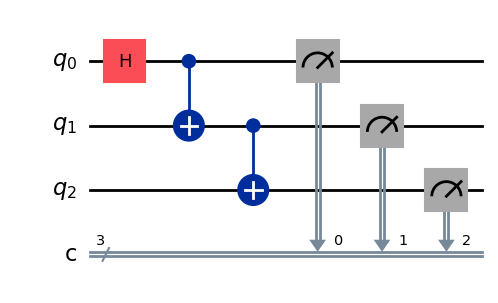

In [24]:
circ.draw(output="mpl", idle_wires=False, style="iqp")

In [ ]:
backendName = '*sherbrooke*' 
noise_model = noise_model_modified.NoiseModel.from_backend(
    gate_error=True,
    readout_error=True,
    thermal_relaxation=True,
    temperature=0,
    gate_lengths=True,
    gate_length_units="ns",
    warnings=None,
    path = dir,
    ibmname = backendName
)

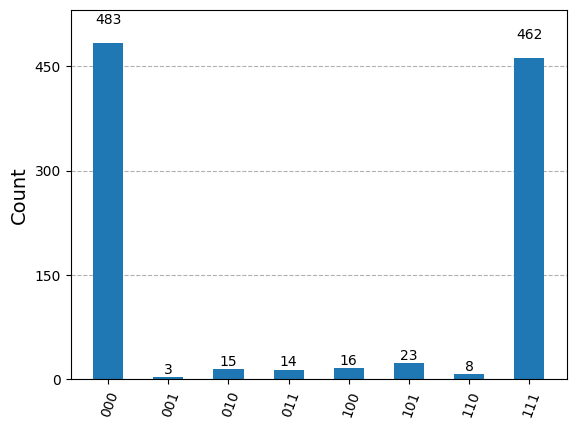

In [11]:
#emulated qc- Sherboorke-calibrated

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

In [ ]:
backendName = '*brisbane*' 
noise_model = noise_model_modified.NoiseModel.from_backend(
    gate_error=True,
    readout_error=True,
    thermal_relaxation=True,
    temperature=0,
    gate_lengths=True,
    gate_length_units="ns",
    warnings=None,
    path = dir,
    ibmname = backendName
)

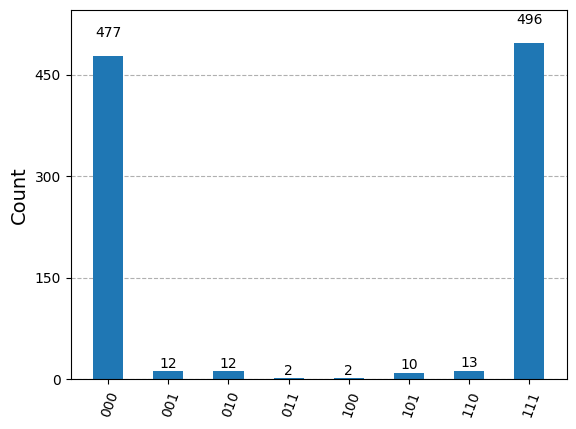

In [39]:
#emulated qc- Brisbane

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

In [ ]:
backendName = '*osaka*'
noise_model = noise_model_modified.NoiseModel.from_backend(
    gate_error=True,
    readout_error=True,
    thermal_relaxation=True,
    temperature=0,
    gate_lengths=True,
    gate_length_units="ns",
    warnings=None,
    path = dir,
    ibmname = backendName
)

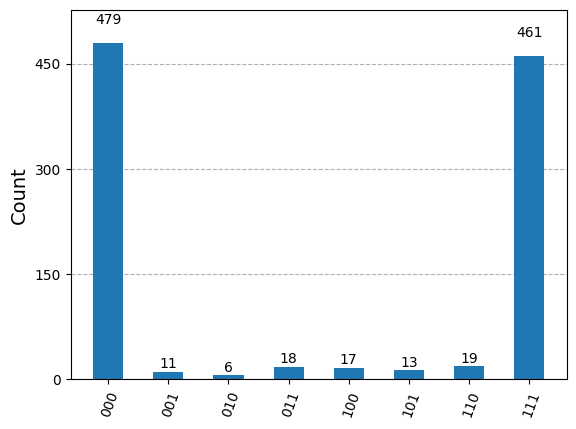

In [35]:
#emulated qc- Osaka

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

In [ ]:
backendName = '*sherbrooke*'
noise_model = noise_model_modified.NoiseModel.from_backend(
    gate_error=True,
    readout_error=True,
    thermal_relaxation=True,
    temperature=0,
    gate_lengths=True,
    gate_length_units="ns",
    warnings=None,
    path = dir,
    ibmname = backendName
)

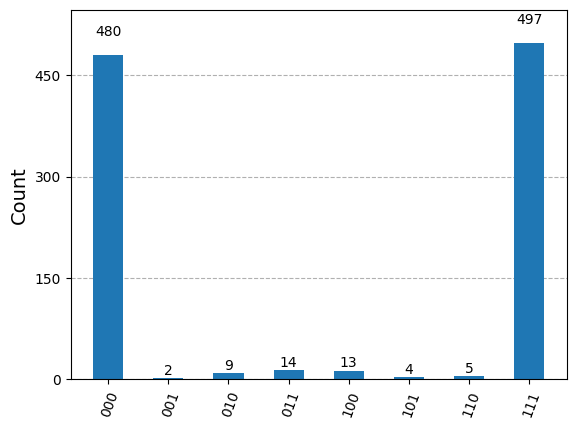

In [37]:
#emulated qc- Sherbrooke

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

In [ ]:
backendName = '*kyoto*'
noise_model = noise_model_modified.NoiseModel.from_backend(
    gate_error=True,
    readout_error=True,
    thermal_relaxation=True,
    temperature=0,
    gate_lengths=True,
    gate_length_units="ns",
    warnings=None,
    path = dir,
    ibmname = backendName
)

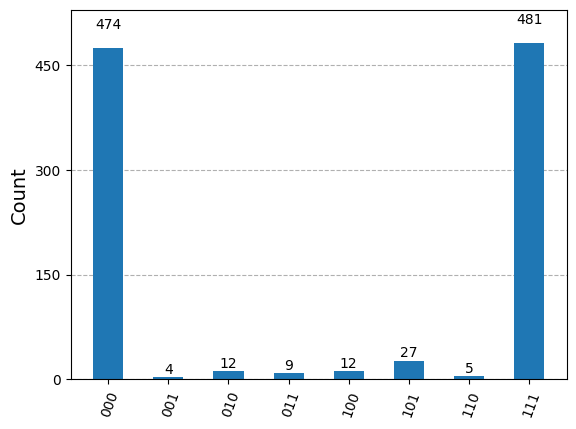

In [20]:
#emulated qc- Kyoto with replaced readout error

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

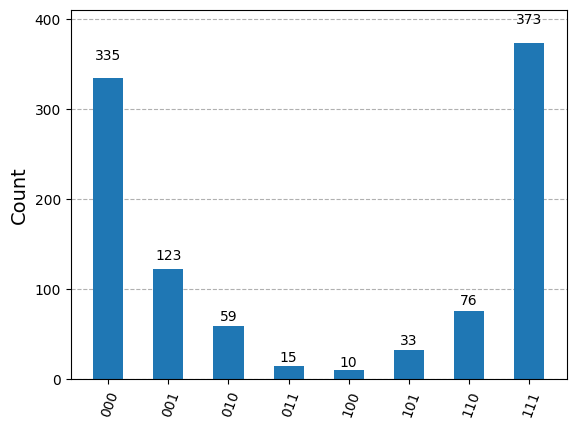

In [39]:
#emulated qc- Kyoto

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

# Compare your quantum databse with IBM backends 

In [51]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
 
# Import from Qiskit Aer noise module if you would like to compare
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [194]:
noise_model = NoiseModel.from_backend(backend)

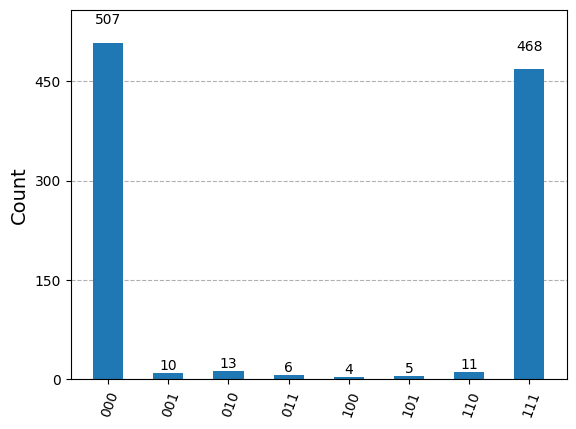

In [186]:
#emulated qc- Sherbrooke

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

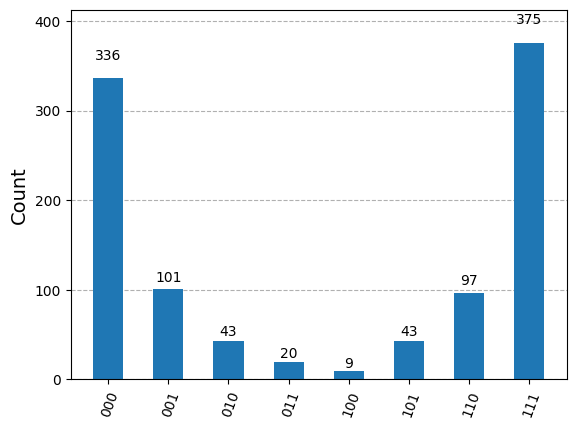

In [189]:
#emulated qc- Kyoto

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

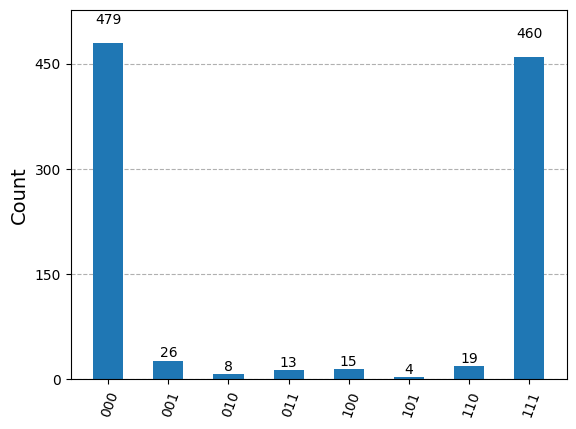

In [192]:
#emulated qc- Osaka

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)

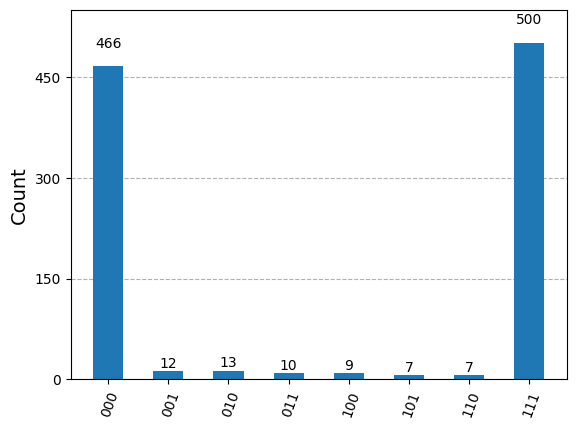

In [195]:
#emulated qc- brisbane

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_model)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tthermal = passmanager.run(circ)
 
# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_thermal)